In [20]:
df<-read.csv('d:/data/iris/iris2.csv')
head(df)

sepal.length..cm.,sepal.width..cm.,petal.length..cm.,petal.width..cm.,target,Result
5.1,3.5,1.4,0.2,setosa,0
4.9,3.0,1.4,0.2,setosa,0
4.7,3.2,1.3,0.2,setosa,0
4.6,3.1,1.5,0.2,setosa,0
5.0,3.6,1.4,0.2,setosa,0
5.4,3.9,1.7,0.4,setosa,0


In [21]:
library(dplyr)
df<-df %>% select(-target)
#Result 필드를 팩터 타입으로 변환
df$Result <- as.factor(df$Result)
head(df)

sepal.length..cm.,sepal.width..cm.,petal.length..cm.,petal.width..cm.,Result
5.1,3.5,1.4,0.2,0
4.9,3.0,1.4,0.2,0
4.7,3.2,1.3,0.2,0
4.6,3.1,1.5,0.2,0
5.0,3.6,1.4,0.2,0
5.4,3.9,1.7,0.4,0


In [22]:
library(caret)
set.seed(123)
idx_train<-createDataPartition(y=df$Result, p=0.8, list=F)
train<-df[idx_train,]
X_train<-train[,-5]
y_train<-train[,5]
test<-df[-idx_train,]
X_test<-test[,-5]
y_test<-test[,5]

k,accuracy
1,1


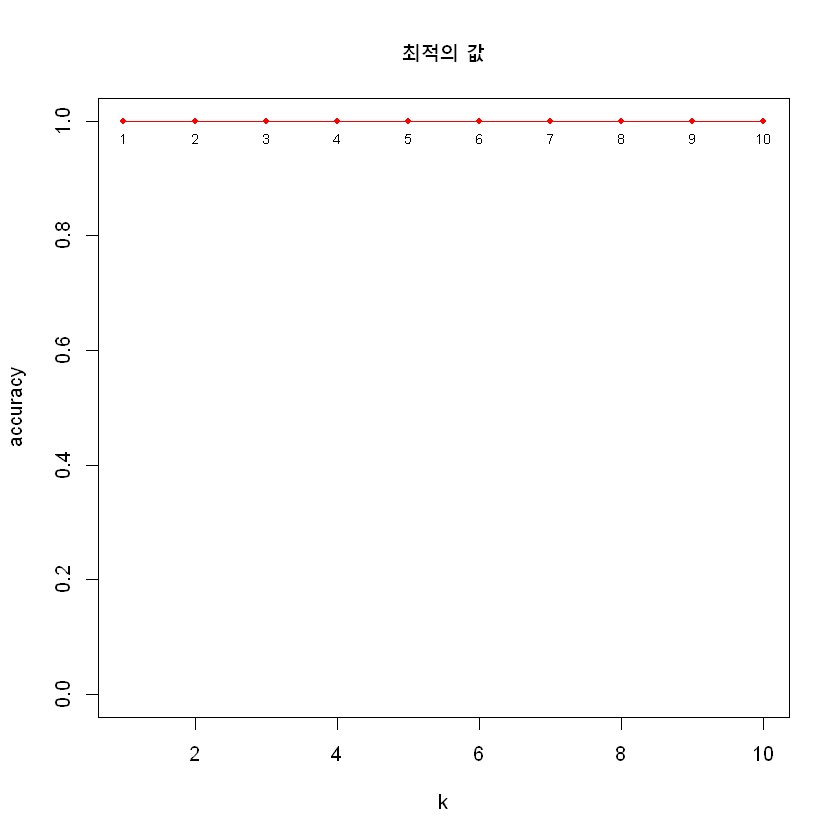

In [28]:
library(class)
acc<-NULL
for (i in c(1:10)){
    set.seed(123)
    pred = knn(train=train, test=test, cl=y_train, k=i)
    acc<- c(acc,mean(y_test == pred))
}
df<-data.frame(k=c(1:10), accuracy=acc)
plot(accuracy ~ k, data=df, type='o',pch=20,main='최적의 값',
    ylim=c(0,1), col='red')
with(df,text(accuracy ~ k, labels=c(1:10),pos=1, cex=0.7))
n<-min(df[df$accuracy %in% max(acc), 'k'])
df[n,]

In [31]:
library(class)
set.seed(100)
pred<-knn(train=train, test=test, cl=y_train,k=n)
table(y_test,pred)
mean(y_test==pred)

      pred
y_test  0  1  2
     0 10  0  0
     1  0 10  0
     2  0  0 10

[1] 1